<a href="https://colab.research.google.com/github/Xinsen-Zhang/torch-study/blob/master/08_%E5%8A%A8%E9%87%8F%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 动量法
$$v_i = \gamma v_{i-1} + \eta \nabla L(\theta)$$
$$\theta_i = \theta_{i-1} - v_i$$

In [0]:
def sgd_momentum(parameters, vs, lr, gamma):
    for param, v in zip(parameters, vs):
        v[:] = gamma * v + lr * param.grad.data
        param.data = param.data - v

In [0]:
import numpy as np
import torch
from torchvision.datasets import  MNIST
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
from matplotlib import pyplot as plt
%matplotlib inline

def data_tf(x):
    x = np.array(x, dtype= 'float32') / 255
    x = (x - 0.5) / 0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x

train_set = MNIST('./data', train=True, transform= data_tf, download= True)
test_set = MNIST('./data', train= False, transform= data_tf, download=True)

# 定义loss
criterion = nn.CrossEntropyLoss()

In [0]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)

In [0]:
# 定义3层网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

# 将速度初始化为和参数形状相同的零向量
vs = []
for param in net.parameters():
    vs.append(torch.zeros_like(param.data))

In [0]:
# 将速度搬到 gpu 上
for idx in range(len(vs)):
    vs[idx] = vs[idx].cuda()

In [41]:
# 开始训练
losses = []

# 将定义的网络复制到gpu上
net.cuda()

# 计时开始
start = time.time()

for e in range(5):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_momentum(net.parameters(), vs, 1e-2, 0.9)
        
        # 记录误差
        train_loss += loss.data
        losses.append(loss.data)
        duration_ = time.time() - start_
    print('epoch {}. Train Loss: {:.5f}, duration {:.2f}'.format(e+1, train_loss / len(train_data), duration_))
end = time.time()
duration = end - start
print('使用时间: {:.5f}s'.format(duration))

epoch 1. Train Loss: 0.36400, duration 7.02
epoch 2. Train Loss: 0.17144, duration 6.89
epoch 3. Train Loss: 0.12465, duration 6.81
epoch 4. Train Loss: 0.09985, duration 6.78
epoch 5. Train Loss: 0.08346, duration 6.70
使用时间: 34.20813s


# 使用内置的动量优化器

In [45]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 定义3层网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)
optimizer = torch.optim.SGD(net.parameters(), lr= 1e-2, momentum= 0.9)
# 开始训练
losses = []

# 将定义的网络复制到gpu上
net.cuda()

# 计时开始
start = time.time()
idx = 0
for e in range(10):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses.append(loss.data)
        idx += 1
        duration_ = time.time() - start_
    print('epoch {}. Train Loss: {:.5f}, duration {:.2f}'.format(e+1, train_loss / len(train_data), duration_))
end = time.time()
duration = end - start
print('使用时间: {:.5f}s'.format(duration))

epoch 1. Train Loss: 0.37072, duration 6.39
epoch 2. Train Loss: 0.17746, duration 6.19
epoch 3. Train Loss: 0.13047, duration 6.20
epoch 4. Train Loss: 0.10338, duration 6.20
epoch 5. Train Loss: 0.08622, duration 6.19
epoch 6. Train Loss: 0.07396, duration 6.20
epoch 7. Train Loss: 0.06337, duration 6.18
epoch 8. Train Loss: 0.05692, duration 6.18
epoch 9. Train Loss: 0.05176, duration 6.21
epoch 10. Train Loss: 0.04452, duration 6.23
使用时间: 62.16754s


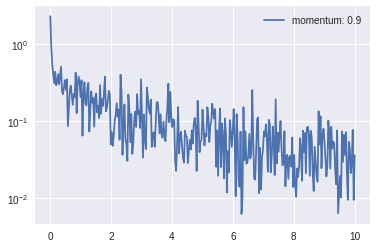

In [46]:
x_axis = np.linspace(0, 10, len(losses), endpoint= True)
plt.semilogy(x_axis, losses, label= 'momentum: 0.9')
plt.legend(loc='best')

## 不使用动量

In [47]:
train_data = DataLoader(train_set, batch_size= 64, shuffle= True)
# 定义3层网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)
optimizer = torch.optim.SGD(net.parameters(), lr= 1e-2)
# 开始训练
losses2 = []

# 将定义的网络复制到gpu上
net.cuda()

# 计时开始
start = time.time()
idx = 0
for e in range(10):
    start_ = time.time()
    train_loss = 0
    for im, label in train_data:
        im = Variable(im.float()).cuda()
        label = Variable(label).cuda()
        
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 记录误差
        train_loss += loss.data
        if(idx % 30 == 0):
            losses2.append(loss.data)
        idx += 1
        duration_ = time.time() - start_
    print('epoch {}. Train Loss: {:.5f}, duration {:.2f}'.format(e+1, train_loss / len(train_data), duration_))
end = time.time()
duration = end - start
print('使用时间: {:.5f}s'.format(duration))

epoch 1. Train Loss: 0.75112, duration 6.28
epoch 2. Train Loss: 0.36520, duration 6.01
epoch 3. Train Loss: 0.32093, duration 6.04
epoch 4. Train Loss: 0.29452, duration 6.04
epoch 5. Train Loss: 0.27370, duration 6.35
epoch 6. Train Loss: 0.25465, duration 6.09
epoch 7. Train Loss: 0.23590, duration 6.30
epoch 8. Train Loss: 0.21927, duration 6.25
epoch 9. Train Loss: 0.20425, duration 6.33
epoch 10. Train Loss: 0.19101, duration 6.23
使用时间: 61.92430s


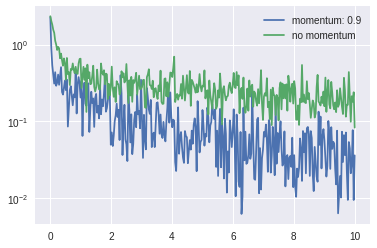

In [48]:
x_axis = np.linspace(0, 10, len(losses), endpoint= True)
plt.semilogy(x_axis, losses, label= 'momentum: 0.9')
plt.semilogy(x_axis, losses2, label= 'no momentum')
plt.legend(loc='best')